In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_data_df = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_df = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data

mouse_data_df.head()

,Mouse ID,Drug
0,f234,Stelasyn
1,x402,Stelasyn
2,a492,Stelasyn
3,w540,Stelasyn
4,v764,Stelasyn


In [2]:
clinical_trial_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [3]:
# Combine the data into a single dataset
combined_df = pd.merge(mouse_data_df, clinical_trial_df, how="left", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
combined_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [4]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 

combined_df_grouped = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].mean()

In [5]:
# Convert to DataFrame

tumor_volume_mean_df = pd.DataFrame(combined_df_grouped)
tumor_volume_mean_df.reset_index(inplace=True)
tumor_volume_mean_df.columns = ['Drug', "Timepoint", "Avg_tumor_volume"]

# Preview DataFrame
tumor_volume_mean_df.head()

,Drug,Timepoint,Avg_tumor_volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [6]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint

tumor_volume_sem = combined_df.groupby(['Drug','Timepoint'])['Tumor Volume (mm3)'].sem()


# Convert to DataFrame

tumor_volume_sem_df = pd.DataFrame(tumor_volume_sem)
tumor_volume_sem_df.reset_index(inplace=True)
tumor_volume_sem_df.columns = ['Drug', "Timepoint", "Tumor_volume_standard_error"]


# Preview DataFrame

tumor_volume_sem_df

,Drug,Timepoint,Tumor_volume_standard_error
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [7]:
# Merge the DataFrames

tumor_data_merged = pd.merge(tumor_volume_mean_df,tumor_volume_sem_df, how="left", on=['Drug'])
tumor_data_merged = tumor_data_merged.rename(columns={"Timepoint_y":"Timepoint"})
tumor_data_merged = tumor_data_merged[['Drug','Timepoint','Avg_tumor_volume','Tumor_volume_standard_error']]
tumor_data_merged.head()

,Drug,Timepoint,Avg_tumor_volume,Tumor_volume_standard_error
0,Capomulin,0,45.0,0.000000
1,Capomulin,5,45.0,0.448593
2,Capomulin,10,45.0,0.702684
3,Capomulin,15,45.0,0.838617
4,Capomulin,20,45.0,0.909731


In [8]:
# Minor Data Munging to Re-Format the Data Frames

tumor_volume_mean_df = tumor_volume_mean_df.reset_index()
tumor_volume_pivot = tumor_volume_mean_df.pivot(index='Timepoint',columns='Drug')['Avg_tumor_volume']

# Preview that Reformatting worked
tumor_volume_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [9]:
# Same thing with the second dataframe

tumor_volume_sem_df = tumor_volume_sem_df.reset_index()
tumor_volume_sem_pivot = tumor_volume_sem_df.pivot(index='Timepoint',columns='Drug')['Tumor_volume_standard_error']

# Preview that Reformatting worked

tumor_volume_sem_pivot



Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


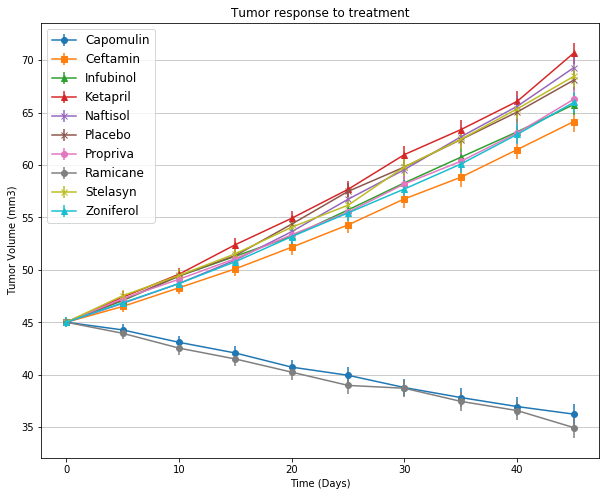

In [10]:
# Generate the Plot (with Error Bars)

#print(tumor_volume_pivot.index)
#print(tumor_volume_pivot['Capomulin'])

fig = plt.figure(figsize=(10,8))
x = tumor_volume_pivot.index

fmt_aid = ['^','o','x','s']

columns_list = tumor_volume_pivot.columns
#print(columns_list)

for i in columns_list:
    y = tumor_volume_pivot.loc[:,i]
    yerr = np.linspace(.5, 1, 10)
    z = random.randint(0,3)
    plt.errorbar(x, y, yerr=yerr, uplims=False, lolims=False, fmt=f'{fmt_aid[z]}-', label=f'{i}')
    
    plt.legend(loc='upper left',fontsize='large')
    plt.grid(b=None, which='major', axis= 'y', color='grey', alpha=0.5)

    
# Set a Title and labels

plt.title("Tumor response to treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")

# Save the Figure

plt.savefig("../Images/response_to_treatment.png")


In [11]:
# Show the Figure
plt.show()

In [ ]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [12]:
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 

combined_df_grouped1 = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].mean()


In [14]:
# Convert to DataFrame

metastatic_mean_df = pd.DataFrame(combined_df_grouped1)
metastatic_mean_df.reset_index(inplace=True)
metastatic_mean_df.columns = ['Drug', "Timepoint", "Avg_metastatic_sites"]

# Preview DataFrame

metastatic_mean_df.head()


,Drug,Timepoint,Avg_metastatic_sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 

combined_df_grouped2 = combined_df.groupby(['Drug','Timepoint'])['Metastatic Sites'].sem()


In [16]:
# Convert to DataFrame

metastatic_sem = pd.DataFrame(combined_df_grouped2)
metastatic_sem.reset_index(inplace=True)
metastatic_sem.columns = ['Drug', "Timepoint", "Metastatic_sites_standard_error"]

# Preview DataFrame

metastatic_sem.head()


,Drug,Timepoint,Metastatic_sites_standard_error
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [17]:
# Minor Data Munging to Re-Format the Data Frames

metastatic_mean_df = metastatic_mean_df.reset_index()
metastatic_mean_pivot = metastatic_mean_df.pivot(index='Timepoint',columns='Drug')['Avg_metastatic_sites']

# Preview that Reformatting worked
metastatic_mean_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118
25,0.818182,1.500000,1.277778,1.631579,1.500000,1.941176,1.357143,0.652174,1.157895,1.687500
30,1.090909,1.937500,1.588235,2.055556,2.066667,2.266667,1.615385,0.782609,1.388889,1.933333
35,1.181818,2.071429,1.666667,2.294118,2.266667,2.642857,2.300000,0.952381,1.562500,2.285714
40,1.380952,2.357143,2.100000,2.733333,2.466667,3.166667,2.777778,1.100000,1.583333,2.785714


In [18]:
# Same thing for sem dataframe

metastatic_sem = metastatic_sem.reset_index()
metastatic_sem_pivot = metastatic_sem.pivot(index='Timepoint',columns='Drug')['Metastatic_sites_standard_error']

# Preview that Reformatting worked

metastatic_sem_pivot


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378
25,0.181818,0.258831,0.265753,0.288275,0.185240,0.263888,0.199095,0.119430,0.219824,0.236621
30,0.172944,0.249479,0.227823,0.347467,0.266667,0.300264,0.266469,0.139968,0.230641,0.248168
35,0.169496,0.266526,0.224733,0.361418,0.330464,0.341412,0.366667,0.145997,0.240983,0.285714
40,0.175610,0.289128,0.314466,0.315725,0.321702,0.297294,0.433903,0.160591,0.312815,0.299791


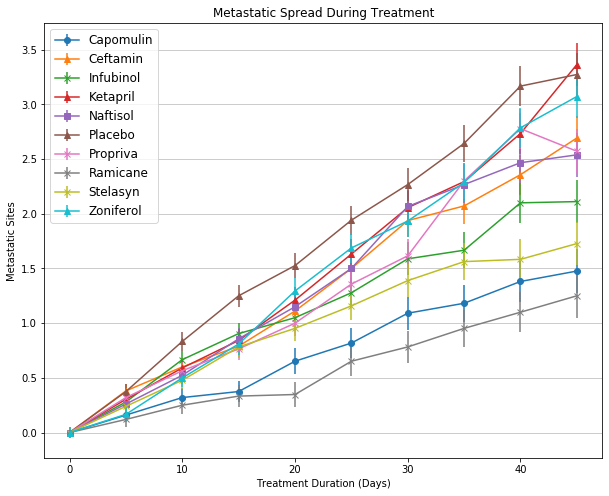

In [19]:
# Generate the Plot (with Error Bars)

fig = plt.figure(figsize=(10,8))
x = metastatic_mean_pivot.index

fmt_aid1 = ['^','o','x','s']

columns_list1 = metastatic_mean_pivot.columns
#print(columns_list)

for i in columns_list1:
    y = metastatic_mean_pivot.loc[:,i]
    yerr = np.linspace(0.05, 0.2, 10)
    t = random.randint(0,3)
    plt.errorbar(x, y, yerr=yerr, uplims=False, lolims=False, fmt=f'{fmt_aid1[t]}-', label=f'{i}')
    
    
    plt.legend(loc='upper left',fontsize='large')
    plt.grid(b=None, which='major', axis= 'y', color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Metastatic Spread During Treatment")
plt.xlabel("Treatment Duration (Days)")
plt.ylabel("Metastatic Sites")

# Save the Figure

plt.savefig("../Images/metastatic_response.png")


In [20]:
# Show the Figure
plt.show()

In [ ]:
# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [23]:
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [24]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

combined_df_grouped3 = combined_df.groupby(['Drug','Timepoint'])['Mouse ID'].count()


In [25]:
# Convert to DataFrame

mice_count = pd.DataFrame(combined_df_grouped3)
mice_count.reset_index(inplace=True)
mice_count.columns = ['Drug', "Timepoint", "Mice_count"]

# Preview DataFrame

mice_count.head()

,Drug,Timepoint,Mice_count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [26]:
# Minor Data Munging to Re-Format the Data Frames

mice_count = mice_count.reset_index()
mice_count_pivot = mice_count.pivot(index='Timepoint',columns='Drug')['Mice_count']

# Preview the Data Frame

mice_count_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17
25,22,18,18,19,18,17,14,23,19,16
30,22,16,17,18,15,15,13,23,18,15
35,22,14,12,17,15,14,10,21,16,14
40,21,14,10,15,15,12,9,20,12,14


In [27]:
survival_rate_df = mice_count_pivot

for x in mice_count_pivot.columns:
    survival_rate_df[x] = (mice_count_pivot.loc[:,x]/mice_count_pivot.loc[:,x].max())*100

survival_rate_df

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,100.0,100.0,100.0,100.0,100.0,100.0,100.000000,100.0,100.000000,100.0
5,100.0,84.0,100.0,92.0,92.0,96.0,96.153846,100.0,96.153846,96.0
10,100.0,80.0,84.0,88.0,84.0,96.0,88.461538,96.0,88.461538,88.0
15,96.0,76.0,84.0,76.0,84.0,80.0,65.384615,96.0,88.461538,84.0
20,92.0,72.0,80.0,76.0,80.0,76.0,65.384615,92.0,80.769231,68.0
25,88.0,72.0,72.0,76.0,72.0,68.0,53.846154,92.0,73.076923,64.0
30,88.0,64.0,68.0,72.0,60.0,60.0,50.000000,92.0,69.230769,60.0
35,88.0,56.0,48.0,68.0,60.0,56.0,38.461538,84.0,61.538462,56.0
40,84.0,56.0,40.0,60.0,60.0,48.0,34.615385,80.0,46.153846,56.0


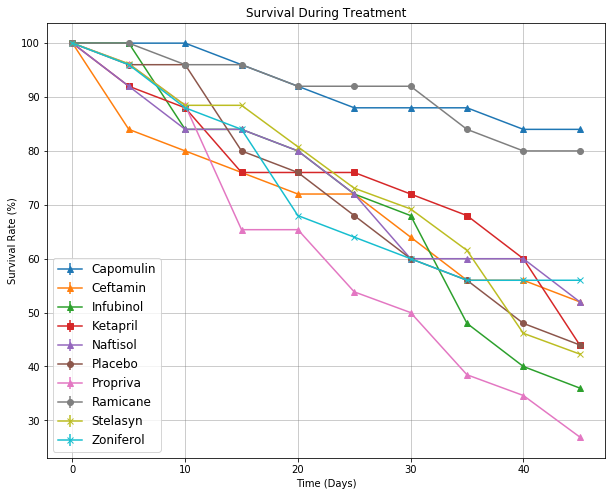

In [28]:
# Generate the Plot (Accounting for percentages)

fig = plt.figure(figsize=(10,8))
x = survival_rate_df.index

fmt_aid = ['^','o','x','s']

columns_list2 = survival_rate_df.columns

for i in columns_list1:
    y = survival_rate_df.loc[:,i]
    yerr = np.linspace(0.05, 0.2, 10)
    w = random.randint(0,3)
    plt.errorbar(x, y, yerr=yerr, uplims=False, lolims=False, fmt=f'{fmt_aid[w]}-', label=f'{i}')
    
    
    plt.legend(loc='lower left',fontsize='large')
    plt.grid(color='grey', alpha=0.5)

# Set a Title and labels

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

# Save the Figure

plt.savefig("../Images/survival_rates.png")



In [29]:
# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [30]:
combined_df.head()

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


In [47]:
tumor_volume_pivot

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334
25,39.939528,54.287674,55.715252,57.678982,56.731968,57.482574,55.504138,38.974300,56.166123,55.432935
30,38.769339,56.769517,58.299397,60.994507,59.559509,59.809063,58.196374,38.703137,59.826738,57.713531
35,37.816839,58.827548,60.742461,63.371686,62.685087,62.420615,60.350199,37.451996,62.440699,60.089372
40,36.958001,61.467895,63.162824,66.068580,65.600754,65.052675,63.045537,36.574081,65.356386,62.916692


In [69]:
# Calculate the percent changes for each drug

drug_pct_change = []

for x in tumor_volume_pivot.columns:
    change = ((tumor_volume_pivot.loc[45,x]/tumor_volume_pivot.loc[0,x])-1)*100
    drug_pct_change.append(change)

drug_pct_change


[-19.47530266789417,
 42.516491855897456,
 46.12347172785187,
 57.02879468660606,
 53.92334713476923,
 51.29796048315151,
 47.24117486320636,
 -22.32090046276667,
 52.085134287899024,
 46.57975086509525]

In [70]:
# Display the data to confirm

drug_pct_change_df = pd.DataFrame(drug_pct_change,tumor_volume_pivot.columns)

drug_pct_change_df.reset_index(inplace=True)
drug_pct_change_df.columns = ["Drug", "Percent_change"]
drug_pct_change_df

,Drug,Percent_change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)